# Analiza ogłoszeń wynajmu - dane z morizon.pl

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("bright")

In [21]:
df_output = pd.read_csv("morizon.csv")

In [22]:
df_output.isna().sum()

Miasto           1
Dzielnica       71
Powierzchnia     1
Pokoje          29
Cena             7
Cena_m2          1
dtype: int64

In [23]:
perc = df_output.describe(percentiles=[0.1, 0.9])["Cena"]
price_min = perc["10%"]
price_max = perc["90%"]
price_min, price_max

(1500.0, 5500.0)

In [24]:
df_output = df_output.query(f"Cena>={price_min} and Cena<={price_max} and Pokoje in (1,2,3,4,5)")
df_output = df_output[df_output.Miasto.isin(["Warszawa","Gdańsk","Kraków","Wrocław","Szczecin","Poznań","Łódź"])]
df_output = df_output.sort_values(["Miasto","Pokoje"])
df_output.Pokoje = df_output.Pokoje.astype('int')

## Mieszkania w Warszawie

In [25]:
cities = ["Warszawa","Gdańsk","Kraków","Wrocław","Szczecin","Poznań","Łódź"]

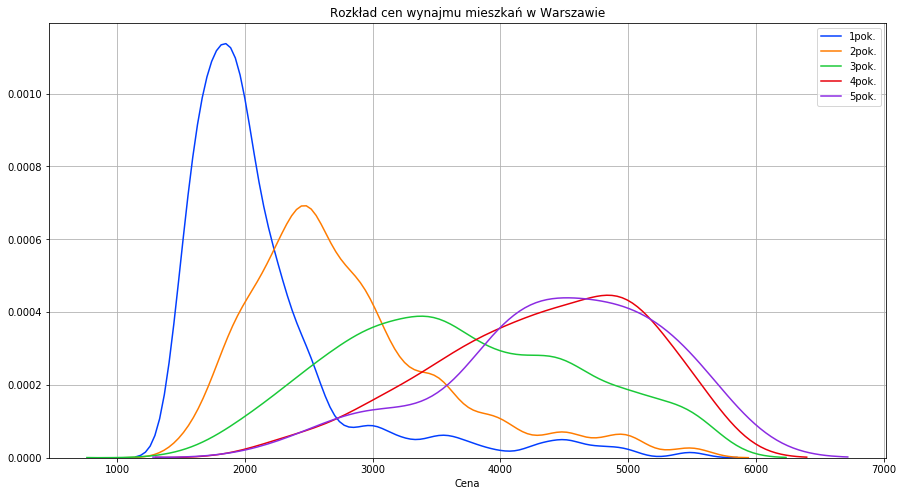

In [26]:
for r in range(1,6):
    sns.distplot( df_output.query(f" Miasto=='Warszawa' and Pokoje=={r}").Cena , label=f"{r}pok.", hist=False)

plt.gcf().set_size_inches(15,8)
plt.legend()
plt.grid()
plt.title("Rozkład cen wynajmu mieszkań w Warszawie")
plt.show()

## Koszt wynajmu mieszkania 1-pokojowego

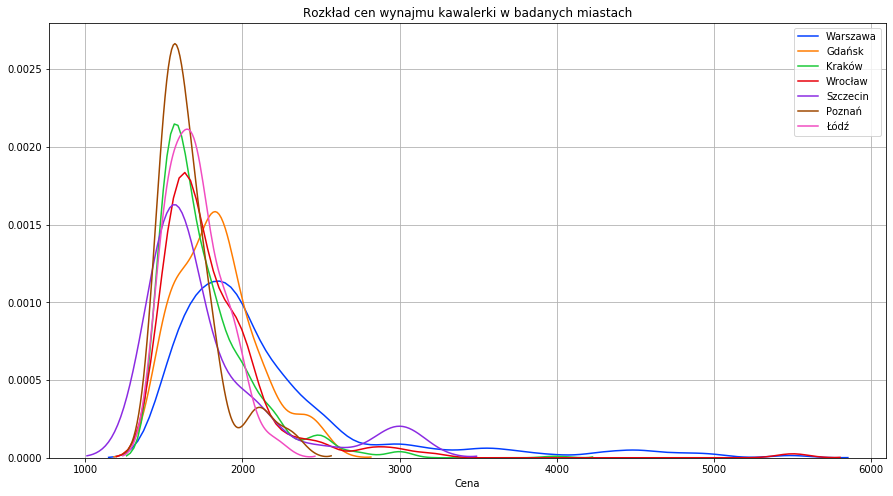

In [27]:
for city in cities:
    sns.distplot( df_output.query(f" Miasto=='{city}' and Pokoje==1").Cena ,label=city, hist=False)

plt.gcf().set_size_inches(15,8)
plt.grid()
plt.legend()
plt.title("Rozkład cen wynajmu kawalerki w badanych miastach")
plt.show()

## Koszt wynajmu mieszkania 2-pokojowego

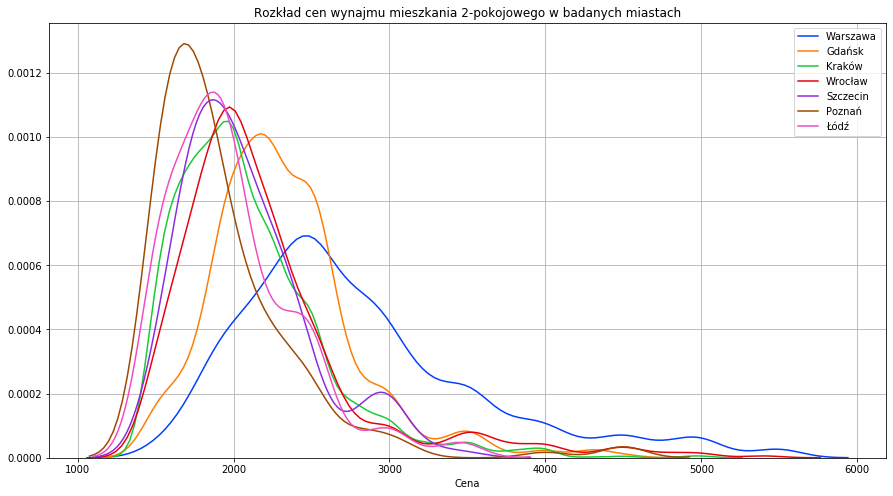

In [28]:
for city in cities:
    sns.distplot( df_output.query(f" Miasto=='{city}' and Pokoje==2").Cena ,label=city, hist=False)

plt.gcf().set_size_inches(15,8)
plt.grid()
plt.legend()
plt.title("Rozkład cen wynajmu mieszkania 2-pokojowego w badanych miastach")
plt.show()

## Wartości ceny wynajmu, powierzchni i ceny/m2 w zależności od miasta i liczby pokojów

In [29]:
dfg = df_output.groupby(['Miasto','Pokoje'])
dfg[["Cena","Powierzchnia","Cena_m2"]].median()

Cena  Powierzchnia  Cena_m2
Miasto   Pokoje                               
Gdańsk   1       1800.0        30.000   60.710
         2       2250.0        45.000   50.750
         3       3000.0        65.000   45.160
         4       3000.0        90.210   39.030
         5       3500.0       115.000   30.430
Kraków   1       1650.0        32.000   55.460
         2       2000.0        46.000   44.230
         3       2600.0        65.320   40.180
         4       3200.0        90.000   34.960
         5       3900.0       116.415   34.210
Poznań   1       1600.0        31.000   54.840
         2       1800.0        49.000   37.500
         3       2100.0        64.000   34.150
         4       2500.0        86.775   28.905
         5       3500.0       145.000   24.165
Szczecin 1       1600.0        30.150   51.640
         2       2000.0        46.000   44.510
         3       2800.0        70.000   36.700
         4       3500.0       100.000   33.330
         5       3200.0       111.015   30.055
Warszawa 1       1950.0        31.000   65.750
         2       2600.0        47.500   56.350
         3       3500.0        70.000   50.000
         4       4460.0        95.000   44.675
         5       4500.0       113.000   39.290
Wrocław  1       1700.0        30.000   58.330
         2       2000.0        48.000   44.970
         3       2500.0        64.000   39.210
         4       4200.0        91.500   40.295
         5       3500.0        83.000   39.760
Łódź     1       1700.0        36.000   47.025
         2       1900.0        48.250   40.820
         3       2300.0        65.720   35.000
         4       2900.0       100.000   33.000
         5       2650.0       147.500   20.825

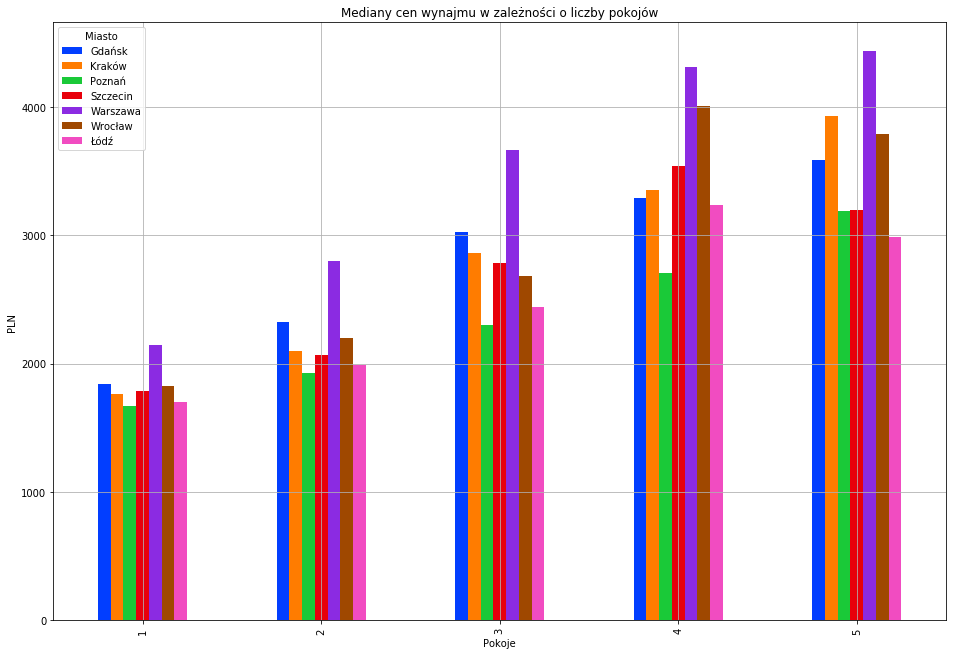

In [30]:
df1 = dfg[["Cena","Powierzchnia","Cena_m2"]].mean().reset_index()
df1.pivot_table(index='Pokoje', columns='Miasto', values='Cena').plot(kind='bar', figsize=(16,11), grid=True)
plt.title("Mediany cen wynajmu w zależności o liczby pokojów")
plt.ylabel('PLN')
plt.show()